In [2]:
import tensorflow as tf
from PIL import Image
from tensorflow.keras import layers

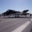

In [3]:
img=Image.open("/home/student/Desktop/PYTHON/G18/Image/cifar10/train/airplane/10010_airplane.png")
img

In [4]:
img.size

(32, 32)

In [6]:
data=tf.keras.utils.image_dataset_from_directory("/home/student/Desktop/PYTHON/G18/Image/cifar10/train",
    image_size=(32,32),
    color_mode="rgb",
    batch_size=5000)

                                            

Found 50000 files belonging to 10 classes.


In [7]:
for fe,la in data:
    print(fe.shape,la.shape)
    break

2022-12-15 16:53:45.289655: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:392] Filling up shuffle buffer (this may take a while): 1257 of 400000
2022-12-15 16:53:55.285291: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:392] Filling up shuffle buffer (this may take a while): 2568 of 400000
2022-12-15 16:54:05.290378: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:392] Filling up shuffle buffer (this may take a while): 3619 of 400000
2022-12-15 16:54:15.289757: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:392] Filling up shuffle buffer (this may take a while): 4911 of 400000
2022-12-15 16:54:25.375089: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:392] Filling up shuffle buffer (this may take a while): 6125 of 400000
2022-12-15 16:54:35.315031: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:392] Filling up shuffle buffer (this may take a while): 7091 of 400000
2022-12-15 16:54:45.292771: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:392] Fi

(50000, 32, 32, 3) (50000,)


In [8]:
cnn_model=tf.keras.Sequential([
    layers.Conv2D(9,3,input_shape=(32,32,3)),
    layers.MaxPool2D(),
    layers.Conv2D(18,3),
    layers.MaxPool2D(),
    layers.Conv2D(36,3,),
    layers.MaxPool2D(),
    layers.Flatten(),
    layers.Dense(64),
    layers.Dense(10),
    layers.Softmax()
])

In [9]:
cnn_model.build(input_shape=(1,32,32,3))
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 9)         252       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 9)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 18)        1476      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 18)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 36)          5868      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 36)         0

In [10]:
cnn_model.compile(loss=tf.keras.losses.categorical_crossentropy,optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])

In [ ]:
for images,labels in data:
    features=tf.divide(fe,252)
    labels=tf.one_hot(la,10)
    record=cnn_model.fit(features,labels,batch_size=50,epochs=10)
    break

2022-12-15 17:03:06.213149: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:392] Filling up shuffle buffer (this may take a while): 1 of 400000
2022-12-15 17:03:15.074893: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:392] Filling up shuffle buffer (this may take a while): 298 of 400000
2022-12-15 17:03:24.874180: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:392] Filling up shuffle buffer (this may take a while): 679 of 400000
2022-12-15 17:03:34.801372: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:392] Filling up shuffle buffer (this may take a while): 1203 of 400000
2022-12-15 17:03:44.792915: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:392] Filling up shuffle buffer (this may take a while): 1858 of 400000
2022-12-15 17:03:54.816212: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:392] Filling up shuffle buffer (this may take a while): 2698 of 400000
2022-12-15 17:04:04.742756: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:392] Filling

2022-12-15 17:12:04.751799: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:392] Filling up shuffle buffer (this may take a while): 49921 of 400000
2022-12-15 17:12:06.060270: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:417] Shuffle buffer filled.
2022-12-15 17:12:06.537369: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 614400000 exceeds 10% of free system memory.
